Exploração e limpeza de dados


In [40]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

Carregar dataset

In [41]:
caminho = "../data/tweet.csv"

if not os.path.exists(caminho):
  raise FileNotFoundError(f"arquivo não encontrado: {caminho}")

df = pd.read_csv(caminho)
display(df.head())

,text,label
0,Adorei o produto de investimentos no mercado d...,positivo
1,O serviço de instalação internet foi péssimo. ...,negativo
2,Entrega rápida com atendimento excelente,positivo
3,Não voltarei a comprar,negativo
4,"Adorei o produto, superou minhas expectativas!",positivo


Analise exploratoria

In [42]:
print(df.info())
print(df.isnull().sum())

# checar colunas presentes
if "label" not in df.columns or "text" not in df.columns:
    raise ValueError("Colunas 'label' e 'text' devem existir no dataset.")

# checar se há valores vazios (strings vazias)
if df["text"].str.strip().eq("").any() or df["label"].str.strip().eq("").any():
    raise ValueError("As colunas 'label' e 'text' não podem conter valores vazios.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8 non-null      object
 1   label   8 non-null      object
dtypes: object(2)
memory usage: 260.0+ bytes
None
text     0
label    0
dtype: int64


label
positivo    5
negativo    3
Name: count, dtype: int64
          text_length
label                
negativo    39.333333
positivo    44.600000


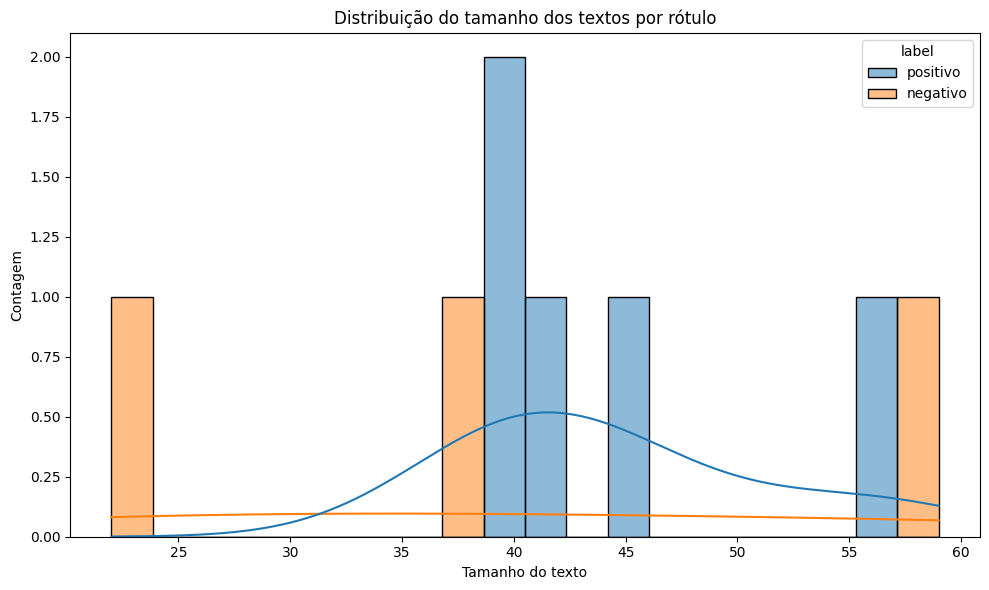

In [43]:
print(df["label"].value_counts())
df["text_length"] = df["text"].astype(str).apply(len)
print(df[["label","text_length"]].groupby("label").mean())

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="text_length", hue="label", bins=20, kde=True)
plt.title("Distribuição do tamanho dos textos por rótulo")
plt.xlabel("Tamanho do texto")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

Salvar dataset

In [44]:
f = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.to_csv("../data/tweet_limpo.csv", index=False)
print("Arquivo salvo em ../data/tweet_limpo.csv")

Arquivo salvo em ../data/tweet_limpo.csv
